# Advertising Sales Channel Prediction

**Problem Statement:**

**Sales Channel Prediction Case Study**

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:

import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [5]:
df.nunique()

Unnamed: 0    200
TV            190
radio         167
newspaper     172
sales         121
dtype: int64

We can see there is no null value in the dataset

 Looking at the unnamed column we can say that it is not required in terms of contributing to any data and removing it will be better for our model.

# Exploratory Data Analysis (EDA)

In [6]:
#Dropping unnecessary data
df = df.drop("Unnamed: 0", axis=1)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Using the info method we can see that the 3 feature column along with the target column are all of the same data type float making it easier for us to go through further data pre processing steps.

In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


I see that only the newspaper column shows a huge gap between it's 75% quantile to it's maximum value while the other two feature columns show reasonable increase between each of their quantiles.

In [9]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

While checking for skewness information we see that none of our feature columns are in the acceptable range of +/-0.5 and this indicates towards the presence of outliers which might need to be handled if they are not justifiable.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


Newspaper seems to have outlier/right skewed data, after 75% max is very large

In [11]:
df.shape

(200, 4)

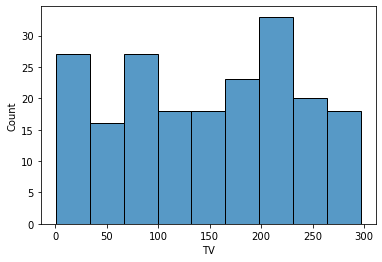

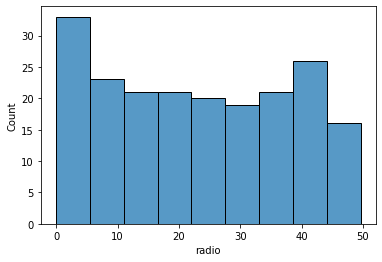

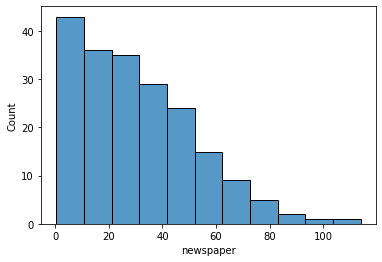

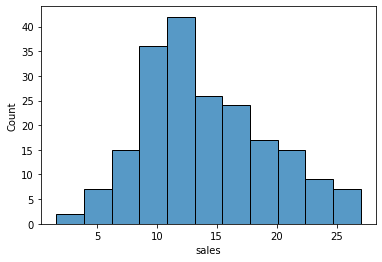

In [12]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

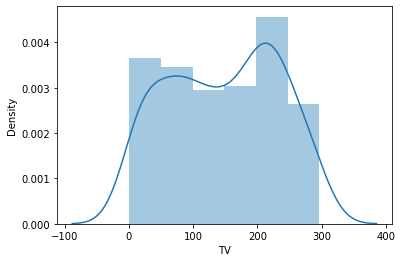

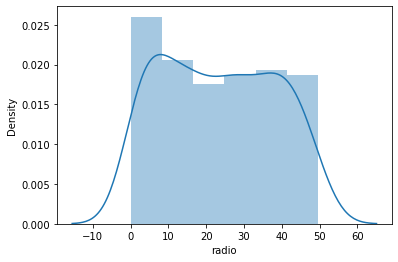

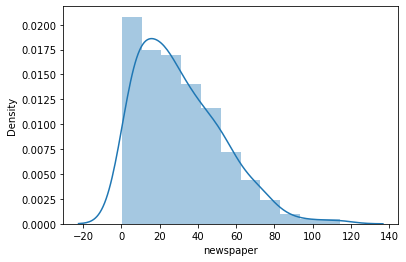

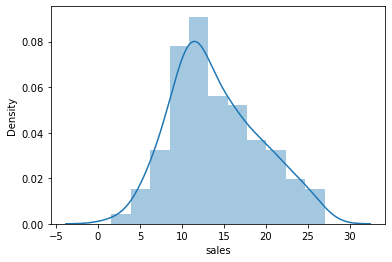

In [12]:
for i in df.columns:
    sns.distplot(df[i],kde=True)
    plt.show()

<AxesSubplot:xlabel='TV', ylabel='sales'>

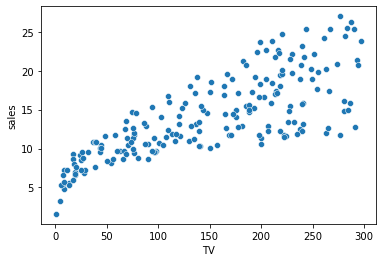

In [13]:
sns.scatterplot(x='TV',y='sales', data=df)

TV has a positive correlation with sales, as the TV advisement increases, sales increases

<AxesSubplot:xlabel='radio', ylabel='sales'>

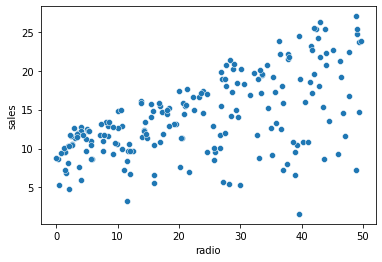

In [14]:
sns.scatterplot(x='radio',y='sales', data=df)

Although radio have positive correlation with sales, some points are like higher radio advertisement but still low sales

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

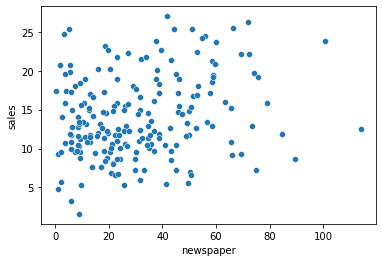

In [15]:
sns.scatterplot(x='newspaper',y='sales',data=df)

Data is scattered all over, clearly not visible if newspaper have any good correlation with sales.

We need to predict sales for any advertisement. It will help to understand, where we need to put advertisement to increase our sales

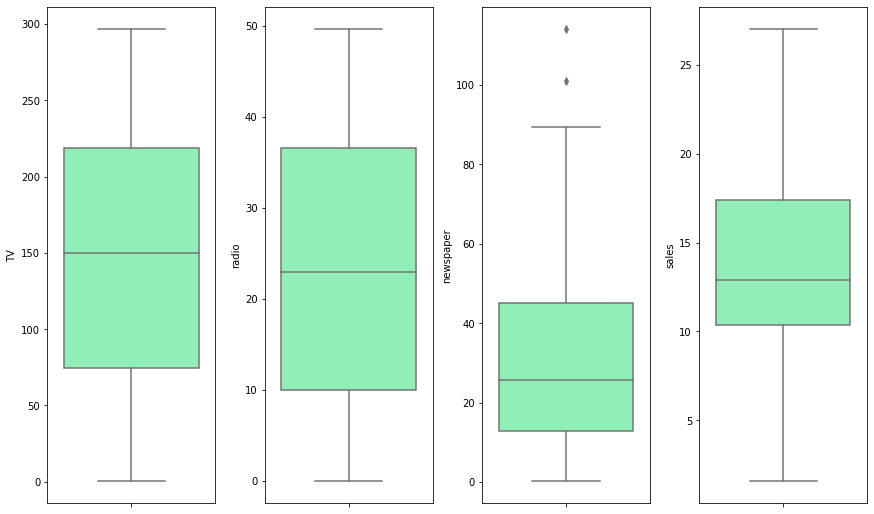

In [16]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="rainbow")
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

The above boxplot shows that only the newspaper column has 2 outliers which may be genuine or not that need to be checked and treated if required.

<Figure size 1080x720 with 0 Axes>

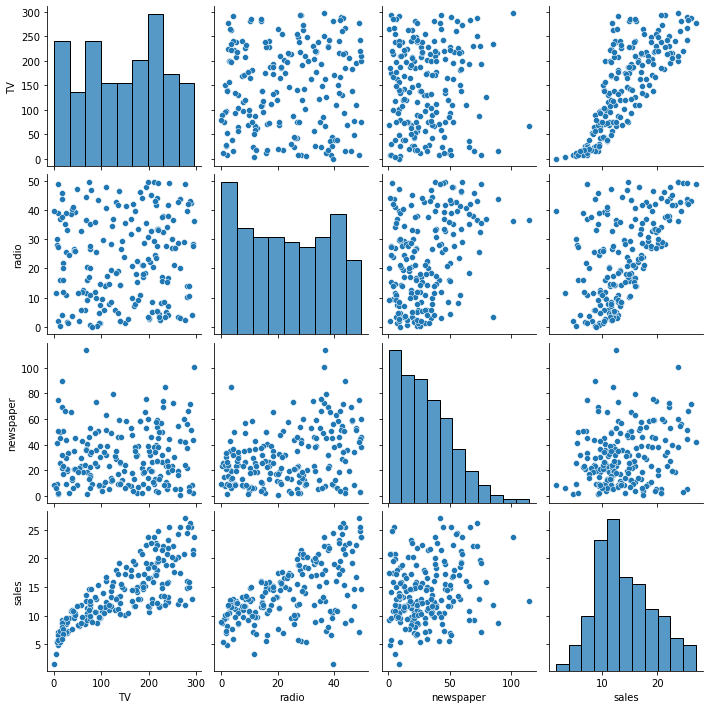

In [17]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()

With the help of above pairplot we can see that TV and Radio columns have a linear relationship with Sales. However the Newspaper column is too scattered and we can see an increase with respect to sales but their is no definite linear pattern into it.

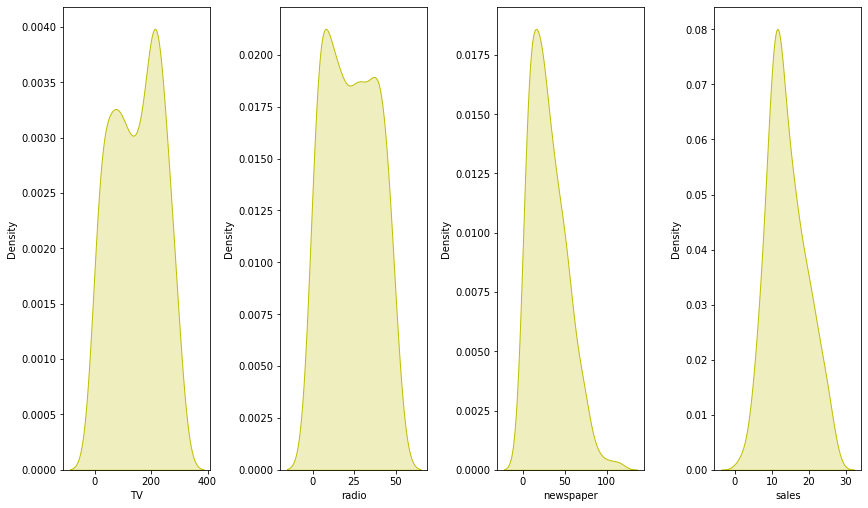

In [18]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Looking at the above distribution plot we can see that almost all the columns are maintaining the bell shape curve except for the newspaper column where we can see a visible skewness.

# Correlation:

In [19]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

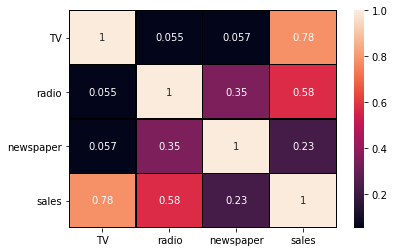

In [20]:
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=.25)

From the Heat map we can see that almost all columns are positively correleated.

Sales and TV has strong correlation  .78

sales and radio has good correlation .58

sales and newspaper has low correlation .23

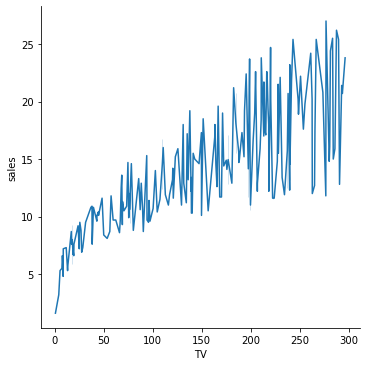

In [21]:
sns.relplot(x="TV", y="sales", kind="line", data=df)

The line plot for TV vs Sales shows a proper increasing pattern wherein the TV advertisements are playing a major role in the marketing field thus inreasing the sales.

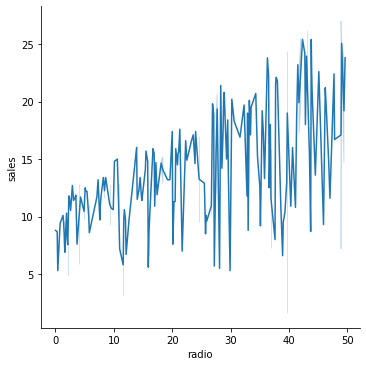

In [22]:
sns.relplot(x="radio", y="sales", kind="line", data=df)

The line plot for Radio vs Sales do not show a dominant relationship when it comes to sales like the TV option but it is definitely contributing towards the sales parameter.

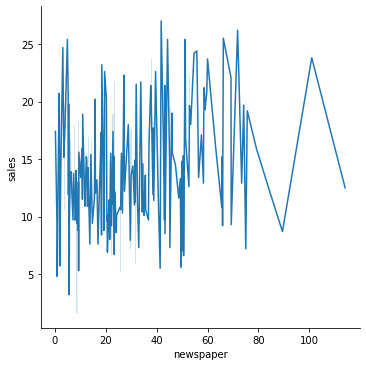

In [23]:
sns.relplot(x="newspaper", y="sales", kind="line", data=df)

Lastly, looking at the line plot for Newspaper vs Sales we see a very random trend where in the begin the contribution is way better than towards the end showing that the outliers reflecting in our data are mere flukes where in it contributed towards the sales from that mode of marketing.

In [24]:
# only Newspaper have outliers, lets handle them through IQR
df['newspaper'].min()

0.3

In [25]:
df['newspaper'].max() 


114.0

In [26]:
df['newspaper'].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: newspaper, dtype: float64

Outliers are present on upper side only, lets handler then

In [27]:
IQR= df['newspaper'].quantile(.75)- df['newspaper'].quantile(.25)
IQR

32.35

In [28]:
#lower= Q1- (1.5* IQR)  # no outlier in lowe side
#upper= Q3+(1.5* IQR)

#X['Fare']= np.where(X['Fare']> upper,upper,X['Fare'])
upper= df['newspaper'].quantile(.75) + (1.5 * IQR)
upper

93.625

In [29]:
df['newspaper']= np.where(df['newspaper']>upper,upper,df['newspaper'])

<AxesSubplot:xlabel='newspaper'>

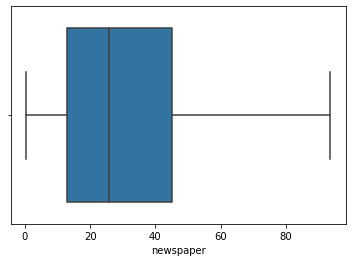

In [30]:
sns.boxplot(df['newspaper'])

Outlier is removed

In [31]:
x = df.drop('sales', axis=1)
y = df['sales']

**Feature Scaling**

In [32]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson') 

In [33]:
from sklearn.preprocessing import StandardScaler # transforms data such that mean =0 and std dev=1
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.94867429,  0.96224689,  1.53773716],
       [-1.19131426,  1.0401788 ,  0.79472708],
       [-1.6477566 ,  1.37070964,  1.54046897],
       [ 0.14102023,  1.14238689,  1.23066168],
       [ 0.45271493, -0.74865064,  1.22764076],
       [-1.82382233,  1.51501853,  1.69246973],
       [-1.00249116,  0.69372704, -0.11268786],
       [-0.210275  , -0.10158544, -0.85057892],
       [-1.82609501, -1.63345378, -2.11620688],
       [ 0.64764492, -1.56676988, -0.23476035],
       [-0.88377378, -1.20298758, -0.07691632],
       [ 0.79708355,  0.18072579, -1.60050754],
       [-1.52641627,  0.81900563,  1.44623798],
       [-0.48036844, -1.02813642, -1.23342927],
       [ 0.69106577,  0.6992403 ,  0.82623392],
       [ 0.60295713,  1.45770359,  1.05652433],
       [-0.86079972,  0.89906999,  2.14593479],
       [ 1.4355201 ,  1.05563142,  1.14799585],
       [-0.84199328, -0.04209908, -0.40009193],
       [ 0.09508551,  0.17453165, -0.35306736],
       [ 0.8337607 ,  0.40367061,  1.072

# VIF to check multicolinearity

In [34]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"]=pd.DataFrame(x).columns
vif_data["VIF Value"]=[variance_inflation_factor(pd.DataFrame(x).values, i)
                          for i in range(len(pd.DataFrame(x).columns))]
print(vif_data)

   Features  VIF Value
0         0   1.003187
1         1   1.095233
2         2   1.094783


No multicolinearity found between independent variables, safe range is -5 to +5

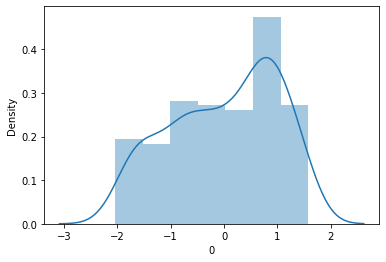

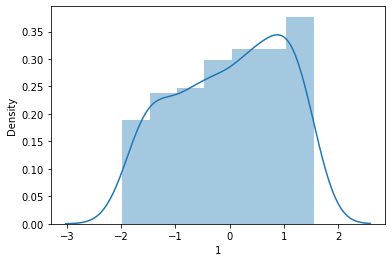

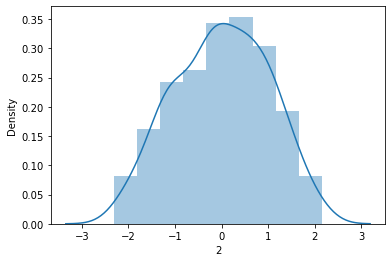

In [35]:
for i in pd.DataFrame(x).columns:
    sns.distplot(pd.DataFrame(x)[i],kde=True)
    plt.show()

We can see skewness is removed, we can procedd with the Model.

# Finding Best Random State

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

maxAccu=0 #max accuracy
maxRS=0   #best random state value for which max accuracy is achieved

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lm=LinearRegression()
    lm.fit(x_train, y_train)
    pred = lm.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        

print("Best R2 score is", maxAccu,"at Random State",i)
print('At random state', i,'lm training score is: ', round(lm.score(x_train, y_train),4))
print('At random state', i,'lm testing score is: ', round(lm.score(x_test, y_test),4))

Best R2 score is 0.9439330935779289 at Random State 999
At random state 999 lm training score is:  0.9112
At random state 999 lm testing score is:  0.8854


# Using the above result for model building

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=999)

# Different Models

In [41]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Sumit' is not recognized as an internal or external command,
operable program or batch file.


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor

LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()



model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model]

In [41]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print("cross Validation score of ",m ," is ",cross_val_score(m,x,y,cv=5, scoring='neg_mean_squared_error').mean())
    print('\n\n')

mean_absolute_error of  LinearRegression() model 1.1812137538408176
mean_square_error of LinearRegression() model 2.410066416164608
R2 Score of LinearRegression() model 90.48434187844336
cross Validation score of  LinearRegression()  is  -2.7395876993336197



mean_absolute_error of  Ridge() model 1.188461074623951
mean_square_error of Ridge() model 2.439555257547491
R2 Score of Ridge() model 90.3679111729996
cross Validation score of  Ridge()  is  -2.74033282486451



mean_absolute_error of  Lasso() model 1.8109428821034204
mean_square_error of Lasso() model 5.665622099774749
R2 Score of Lasso() model 77.63044097631614
cross Validation score of  Lasso()  is  -4.69484251657357



mean_absolute_error of  DecisionTreeRegressor() model 0.7525000000000001
mean_square_error of DecisionTreeRegressor() model 0.97675
R2 Score of DecisionTreeRegressor() model 96.14350085628692
cross Validation score of  DecisionTreeRegressor()  is  -1.289



mean_absolute_error of  SVR() model 0.940891724956499

RandomForestRegressor is giving the best result here

# Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV
model=RandomForestRegressor()
param={'n_estimators':[10,30,50,70,100],'criterion':['mse','mae'],'min_samples_split':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5]}
grid=GridSearchCV(estimator=model,param_grid=param,cv=5)
grid.fit(x_train,y_train)

print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 30, 50, 70, 100]})
0.9735069458229646
mae
{'criterion': 'mae', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


In [53]:
RF=RandomForestRegressor(criterion ='mae', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 70)
RF.fit(x_train,y_train)
predRF=RF.predict(x_test)
R2_Score=r2_score(y_test,predRF)
print("R2 score for the Best Model is:", R2_Score)


R2 score for the Best Model is: 0.9807259286580999


# Saving the best model

In [51]:
#saved model using joblib library
filename = "Ad_Sales"
joblib.dump(RF, filename)

['Ad_Sales']

# Conclusion

In [52]:
import numpy as np
a=np.array(y_test)
df_com=pd.DataFrame({"original":a,"Predicted":predRF},index=range(len(a)))
df_com

,original,Predicted
0,15.9,15.765714
1,15.0,14.428571
2,21.4,20.437143
3,11.8,11.370000
4,24.7,22.773571
5,13.2,13.167143
6,11.7,12.092857
7,23.7,22.683571
8,15.5,15.547143
9,11.5,12.110000
